In [ ]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [ ]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(23)

## Classification

In [ ]:
iris_data = pd.read_csv("iris.csv")
iris_data.sample(5)

In [ ]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_scatter_plot_with_petal_data.png", dpi=300, bbox_inches = "tight")

In [ ]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [ ]:
four_random_rows = iris_data.sample(4)
four_random_rows

In [ ]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

In [ ]:
decision_tree_model.predict_proba(four_random_rows[["petal_length", "petal_width"]])

In [ ]:
 tree.plot_tree(decision_tree_model) 

In [ ]:
import graphviz 

In [ ]:
import graphviz
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries.png", dpi=300, bbox_inches = "tight")

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty = 'none')
logistic_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.savefig("iris_decision_boundaries_logistic.png", dpi=300, bbox_inches = "tight")

In [ ]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

In [ ]:
iris_data.query("petal_length > 2.45 and petal_width > 1.75 and petal_length <= 4.85")

### Controlling Complexity

`sklearn` provides many different parameters that allow you to control the complexity of a Decision Tree.

In [148]:
np.random.seed(23)

In [149]:
decision_tree_min_dwg = tree.DecisionTreeClassifier(min_impurity_decrease = 0.1)
decision_tree_min_dwg = decision_tree.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

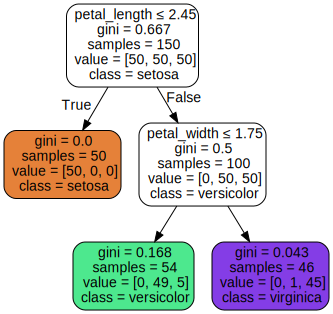

In [150]:
dot_data = tree.export_graphviz(decision_tree_min_dwg, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [ ]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_min_dwg.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.savefig("decision_tree_min_dwg.png", dpi=300, bbox_inches = "tight")

### Using Complexity Controls to Avoid Overfitting

Let's see an example where overfitting occurs. We'll start by splitting out data into a training and test set.

In [151]:
np.random.seed(23)
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

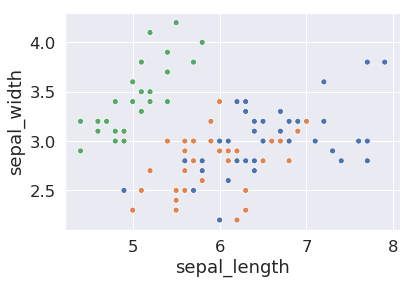

In [152]:
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend = False)
#plt.savefig("sepal_data_no_model.png", dpi=300, bbox_inches = "tight")

In [153]:
#sort so that the color labels match what we had in the earlier part of lecture
train_iris_data = train_iris_data.sort_values(by="species")
test_iris_data = test_iris_data.sort_values(by="species")

Let's now fit a decision tree with no complexity controls.

In [154]:
from sklearn import tree
sepal_tree_no_controls = tree.DecisionTreeClassifier()
sepal_tree_no_controls.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

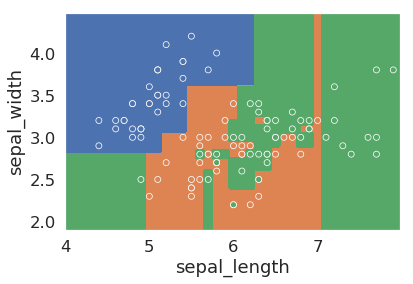

In [155]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_tree_no_controls.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend = False)
plt.savefig("iris_decision_boundaries_sepal_data_no_controls.png", dpi=300, bbox_inches = "tight")

In [156]:
accuracy_score(train_iris_data["species"],
               sepal_tree_no_controls.predict(train_iris_data[["sepal_length", "sepal_width"]]))

0.9454545454545454

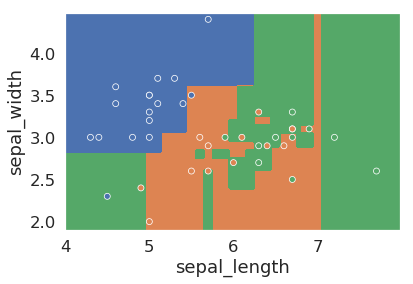

In [157]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_tree_no_controls.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend = False)
plt.savefig("iris_test_decision_boundaries_sepal_data_no_controls.png", dpi=300, bbox_inches = "tight")

In [158]:
accuracy_score(test_iris_data["species"],
               sepal_tree_no_controls.predict(test_iris_data[["sepal_length", "sepal_width"]]))

0.65

In [159]:
#dfile = open("somedot.dot", 'w')
dot_data = tree.export_graphviz(sepal_tree_no_controls, out_file = None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph
dfile.close()

In [160]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1]}
mindwg_decision_tree = tree.DecisionTreeClassifier()
cv_model_finder = GridSearchCV(mindwg_decision_tree, parameters, cv=10)
cv_model_finder.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1]}

In [161]:
cv_model_finder.best_params_

{'min_impurity_decrease': 0.02}

In [162]:
mindwg_decision_tree_with_best_params = cv_model_finder.best_estimator_
mindwg_decision_tree_with_best_params.predict([[4, 3.2]])

array(['setosa'], dtype=object)

In [163]:
sepal_tree_no_controls

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

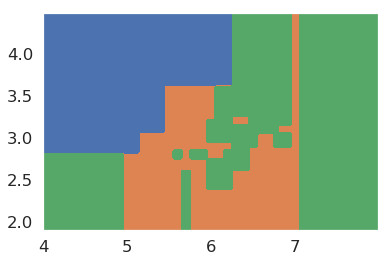

In [164]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_tree_no_controls.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
plt.savefig("iris_test_decision_boundaries_sepal_data_no_controls.png", dpi=300, bbox_inches = "tight")

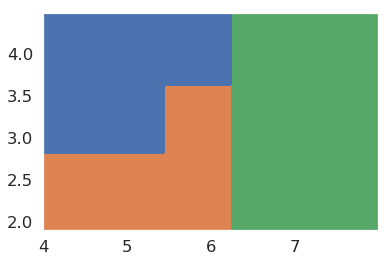

In [165]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = mindwg_decision_tree_with_best_params.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
plt.savefig("iris_test_decision_boundaries_sepal_data_best_mindwg.png", dpi=300, bbox_inches = "tight")

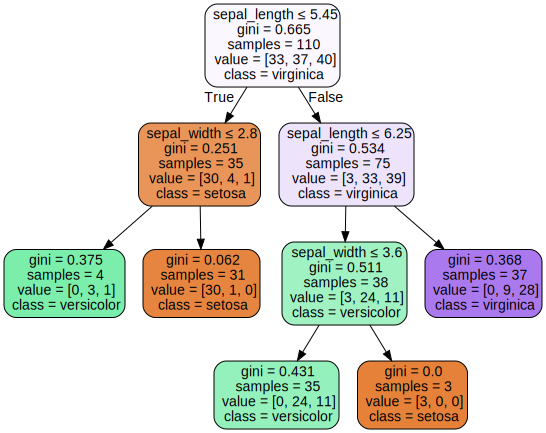

In [166]:
dot_data = tree.export_graphviz(mindwg_decision_tree_with_best_params, out_file = None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [167]:
accuracy_score(test_iris_data["species"],
              mindwg_decision_tree_with_best_params.predict(
                  test_iris_data[["sepal_length", "sepal_width"]]))

0.8

In [173]:
parameters = {'min_samples_split' : [2, 5, 10], 'max_depth':[4, 5, 6, None],
              'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1],
              'ccp_alpha': [0, 0.01, 0.02, 0.05]}
decision_tree_3hp = tree.DecisionTreeClassifier()
cv_model_finder_3hp = GridSearchCV(decision_tree_3hp, parameters, cv=10)
cv_model_finder_3hp.fit(train_iris_data[["sepal_length", "sepal_width"]], 
                        train_iris_data["species"])

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0, 0.01, 0.02, 0.05],
                

In [174]:
cv_model_finder_3hp.best_params_

{'ccp_alpha': 0,
 'max_depth': 4,
 'min_impurity_decrease': 0.01,
 'min_samples_split': 5}

In [170]:
best_3hp_tree = cv_model_finder_3hp.best_estimator_

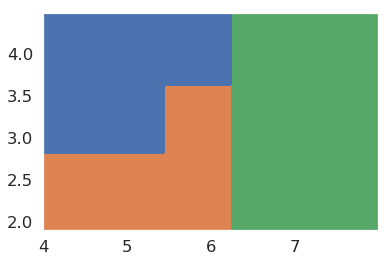

In [172]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = best_3hp_tree.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
#plt.savefig("iris_test_decision_boundaries_sepal_data_best_3hp_tree.png", dpi=300, bbox_inches = "tight")

### Random Forests

In [191]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(iris_data[["sepal_length", "sepal_width"]], iris_data["species"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [194]:
iris_data[["sepal_length", "sepal_width"]].head(9)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9


In [200]:
random_forest_model.predict_proba(iris_data[["sepal_length", "sepal_width"]])[0:10, :]

array([[1.  , 0.  , 0.  ],
       [0.97, 0.  , 0.03],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.04, 0.01],
       [1.  , 0.  , 0.  ]])

In [195]:
random_forest_model.predict_proba([[4.4, 2.9]])

array([[0.95, 0.04, 0.01]])

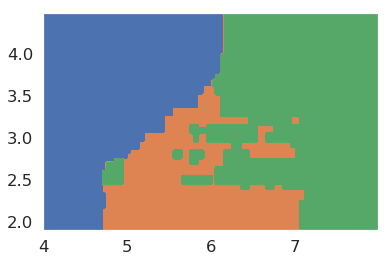

In [198]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
plt.savefig("iris_decision_boundaries_random_forest_no_complexity_controls.png", dpi=300, bbox_inches = "tight")

In [183]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1],
             'n_estimators': [50, 100, 200, 300]}
random_forest_model = RandomForestClassifier()
random_forest_cv = GridSearchCV(random_forest_model, parameters, cv=10)
random_forest_cv.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [184]:
random_forest_cv.best_params_

{'min_impurity_decrease': 0.01, 'n_estimators': 200}

In [186]:
random_forest_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [187]:
best_random_forest_model = random_forest_cv.best_estimator_

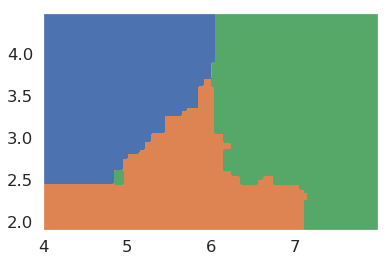

In [199]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = best_random_forest.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
plt.savefig("iris_random_forest_decision_boundaries_mindwg_pt01.png", dpi=300, bbox_inches = "tight")